In [47]:
import numpy as np
import cv2
import numpy as np
import pylab as plt
%matplotlib inline
import math
from math import sqrt

## Draw contour of the crown by using hull and calculate the perimeter of each tree in TLS

In [146]:
img = np.zeros((3000,3000,3), np.uint8)
img1 = img.copy()
img2 = img.copy()
number_of_trees = 559
H = []
CP = []
for t in range(number_of_trees):
    A = abs(255-t)
    B = int(t/2)
    C = A + B
    Tree = 'TLS/TLS_POINTcloud_000' + '{0:03}'.format(t) + '.txt'
    file_tree = np.loadtxt(Tree)
    XY_TLS = []
    z_TLS = [] 
    for k in range(len(file_tree)):
        x_TLS = []
        y_TLS = []
        z_TLS.append((file_tree[k][2]))
        x_TLS.append((file_tree[k][0]*10))
        y_TLS.append((file_tree[k][1]*10))
        x_TLS.extend(y_TLS)
        XY_TLS.append(x_TLS)
    XY = np.array(XY_TLS)
    Z_height = np.max(z_TLS)-np.min(z_TLS)
    H.append(Z_height)
    for j in range(len(XY)):
        ploygon =np.array(XY[j], np.int32)
        pts = ploygon.reshape((-1,1,2))
        cv2.polylines(img1,[pts],True,(255,255,255))
    #plt.imsave('png/tree'+'{0:01}'.format(i)+ '.png',img1)
    gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    image, contours, hierarchy = cv2.findContours(gray, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    c = max(contours, key = cv2.contourArea)
    hull = cv2.convexHull(c)
    distance_sum = 0
    distance_close =  sqrt( (hull[-1][0][0] - hull[0][0][0])**2 + (hull[-1][0][1] - hull[0][0][1])**2 )
    for i in range(len(hull)-1):
        distance = sqrt( (hull[i+1][0][0] - hull[i][0][0])**2 + (hull[i+1][0][1] - hull[i][0][1])**2 )
        distance_sum = distance_sum + distance
    distance_sum = distance_sum + distance_close
    cd = distance_sum/(10*math.pi)
    perimeter =distance_sum/10. 
    CP.append(perimeter)
    for m, point in enumerate(hull):
        try:
            cv2.line(img2, (point[0][0],point[0][1]), (hull[m+1][0][0], hull[m+1][0][1]), (A,B,C), 1)
        except:
            pass
    img1 = np.zeros((3000,3000,3), np.uint8)
    print 'tree',t + 1

tree 1
tree 2
tree 3
tree 4
tree 5
tree 6
tree 7
tree 8
tree 9
tree 10
tree 11
tree 12
tree 13
tree 14
tree 15
tree 16
tree 17
tree 18
tree 19
tree 20
tree 21
tree 22
tree 23
tree 24
tree 25
tree 26
tree 27
tree 28
tree 29
tree 30
tree 31
tree 32
tree 33
tree 34
tree 35
tree 36
tree 37
tree 38
tree 39
tree 40
tree 41
tree 42
tree 43
tree 44
tree 45
tree 46
tree 47
tree 48
tree 49
tree 50
tree 51
tree 52
tree 53
tree 54
tree 55
tree 56
tree 57
tree 58
tree 59
tree 60
tree 61
tree 62
tree 63
tree 64
tree 65
tree 66
tree 67
tree 68
tree 69
tree 70
tree 71
tree 72
tree 73
tree 74
tree 75
tree 76
tree 77
tree 78
tree 79
tree 80
tree 81
tree 82
tree 83
tree 84
tree 85
tree 86
tree 87
tree 88
tree 89
tree 90
tree 91
tree 92
tree 93
tree 94
tree 95
tree 96
tree 97
tree 98
tree 99
tree 100
tree 101
tree 102
tree 103
tree 104
tree 105
tree 106
tree 107
tree 108
tree 109
tree 110
tree 111
tree 112
tree 113
tree 114
tree 115
tree 116
tree 117
tree 118
tree 119
tree 120
tree 121
tree 122
tree 123
t

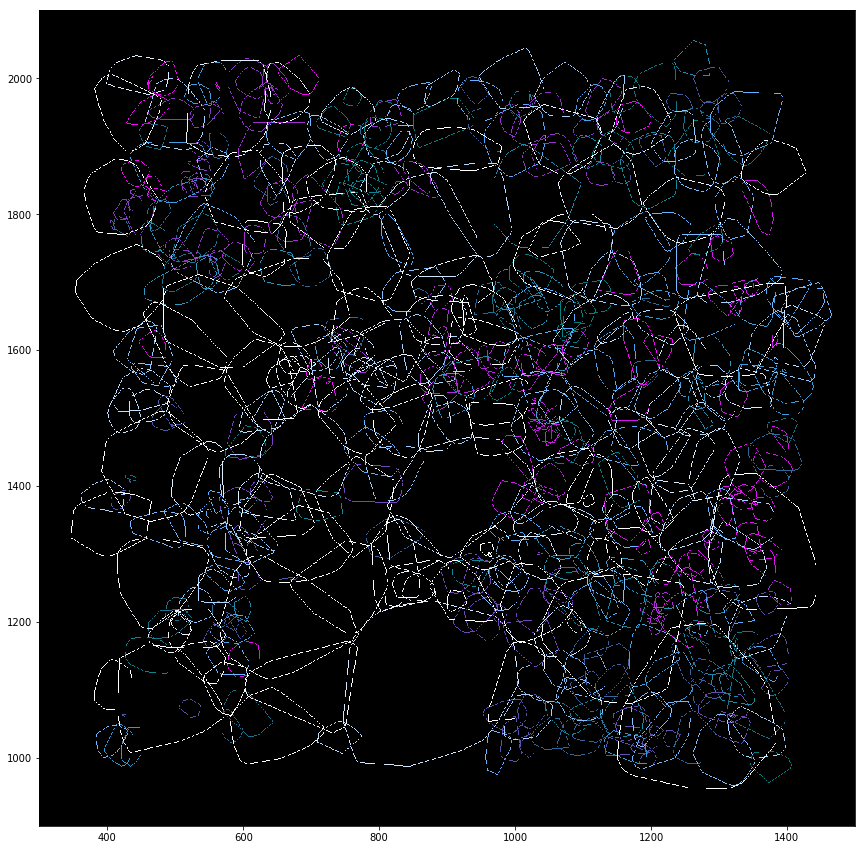

In [44]:
plt.figure(figsize=(15,15))
plt.axis([300,1500,900,2100])
plt.imsave('png/TLS_contour_HUll.png',img2[900:2100,300:1500]
plt.imshow(img2)

## Generate the Linear regression between CP and DBH as well as hight_ca and hight_re

In [45]:
import numpy as np
import pandas as pd
df = pd.DataFrame({"CP" : CP,})
df.to_csv("CP.csv", index=False)

NameError: name 'CP' is not defined

load the DBH into CP.csv

In [144]:
CP = []
DBH = []
for index, line in enumerate(open('CP.csv', 'r').readlines()[1:]):
    w = line.split(',')
    CP.append(float(w[0]))
    DBH.append(float(w[1].strip())) 

In [52]:
CP.sort()
DBH.sort()
H.sort()

CP_VA10 = []
CP_GT10 = []
CP_GT20 = []
for i in range(len(CP)):
    if CP[i] >= 10 and CP[i] <=20:
        CP_GT10.append(CP[i])
    elif CP[i] < 10:
        CP_VA10.append(CP[i])
    elif CP[i] > 20:
        CP_GT20.append(CP[i])
I = len(CP_VA20)        
k = len(CP_VA10)
p = len (CP_GT10)
print k
DBH_VA10 =DBH[:k] 
DBH_GT10 =DBH[k:k+p]
DBH_GT20 =DBH[k+p:]

102


In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.linear_model import LinearRegression

In [54]:
CP_array = np.array(CP)
DBH_array = np.array(DBH)
DBH_VA10_array = np.array(DBH_VA10)
DBH_GT10_array = np.array(DBH_GT10)
DBH_GT20_array = np.array(DBH_GT20)
CP_VA10_array = np.array(CP_VA10)
CP_GT10_array = np.array(CP_GT10)
CP_GT20_array = np.array(CP_GT20)

Model slope: 1.81 
Model intercept:-11.33
Mean squared error: 3330.47
Variance score: -7.76


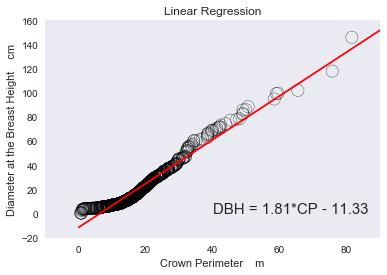

In [61]:
x = CP_array
y = DBH_array 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 90, 559)
yfit = model.predict(xfit[:, np.newaxis])

plt.xlabel('Crown Perimeter    m')
plt.ylabel('Diameter at the Breast Height    cm')
plt.title('Linear Regression')
plt.text(40,0,'DBH = 1.81*CP - 11.33',fontsize=15)
plt.scatter(x, y, s=150,facecolors='none', edgecolors='k')
plt.axis([-10, 90, -20, 160])
plt.plot(xfit, yfit,'r')
plt.grid(False)

print("Model slope: %.2f " % model.coef_[0])
print("Model intercept:%.2f" % model.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y, yfit))
print('Variance score: %.2f' % r2_score(y, yfit))

Model slope: 0.43 
Model intercept:2.48
Mean squared error: 0.60
Variance score: 0.69


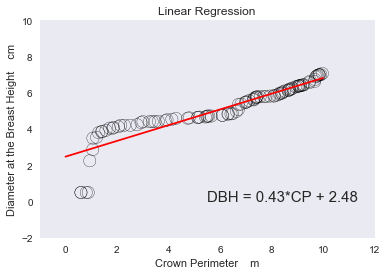

In [60]:
x = CP_VA10_array
y = DBH_VA10_array
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, k)
yfit = model.predict(xfit[:, np.newaxis])

plt.xlabel('Crown Perimeter    m')
plt.ylabel('Diameter at the Breast Height    cm')
plt.title('Linear Regression')
plt.text(5.5,0,'DBH = 0.43*CP + 2.48',fontsize=15)
plt.scatter(x, y, s=150,facecolors='none', edgecolors='k')
plt.axis([-1,12, -2, 10])
plt.plot(xfit, yfit,'r')
plt.grid(False)

print("Model slope: %.2f " % model.coef_[0])
print("Model intercept:%.2f" % model.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y, yfit))
print('Variance score: %.2f' % r2_score(y, yfit))

Model slope: 2.04 
Model intercept:-17.25
Mean squared error: 4430.39
Variance score: -10.50


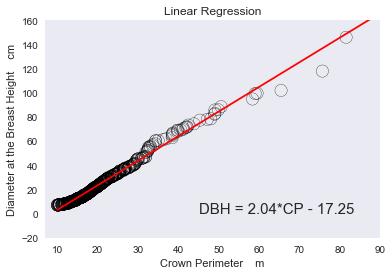

In [59]:
x = CP_GT10_array
y = DBH_GT10_array
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(10, 90, p)
yfit = model.predict(xfit[:, np.newaxis])

plt.xlabel('Crown Perimeter    m')
plt.ylabel('Diameter at the Breast Height    cm')
plt.title('Linear Regression')
plt.text(45,0,'DBH = 2.04*CP - 17.25',fontsize=15)
plt.scatter(x, y, s=150,facecolors='none', edgecolors='k')
plt.axis([7,90, -20, 160])
plt.plot(xfit, yfit,'r')
plt.grid(False)


print("Model slope: %.2f " % model.coef_[0])
print("Model intercept:%.2f" % model.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y, yfit))
print('Variance score: %.2f' % r2_score(y, yfit))

DBH = 1.81*CP-11.33 #CP is crown perimeter which unit is m and DBH is diameter at the breast height which unit is cm 

DBH= 0.43*CP + 2.48 when CP <10

DBH = 2.04*CP-17.25 when CP >= 10

In [19]:
crown = np.loadtxt('crown.txt')
n = np.arange(1,538,1)

## Statistic the crown's position

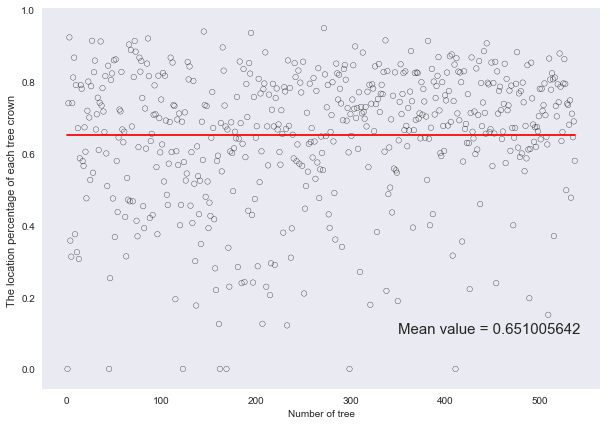

In [44]:
y = []
for i in range(537):
    y.append(0.651005642)
plt.figure(figsize=(10,7))
plt.xlabel('Number of tree',fontsize = 10)
plt.ylabel('The location percentage of each tree crown ')
plt.grid(False)
plt.scatter(n,crown,s=30,facecolors='none', edgecolors='k')
plt.text(350,0.1,'Mean value = 0.651005642',fontsize=15)
plt.plot(n,y,'r')

In [51]:
DBH_2 = []
for i in range(len(CP)):
    
    if CP[i] >= 10:
        dbh_2 = 2.04*CP[i]-17.25 
        DBH_2.append(dbh_2)
    else:
        dbh_2 = 0.43*CP[i] + 2.48
        DBH_2.append(dbh_2)
    print 'tree:',i+1,'   DBH:',DBH_2[i],'cm'

tree: 1    DBH: 14.214430416 cm
tree: 2    DBH: 11.4150971076 cm
tree: 3    DBH: 32.0812936884 cm
tree: 4    DBH: 27.9123093372 cm
tree: 5    DBH: 8.2736747508 cm
tree: 6    DBH: 5.50135585581 cm
tree: 7    DBH: 5.82683616775 cm
tree: 8    DBH: 16.7393529 cm
tree: 9    DBH: 3.77426017469 cm
tree: 10    DBH: 13.2241202292 cm
tree: 11    DBH: 3.74163634731 cm
tree: 12    DBH: 17.9154091464 cm
tree: 13    DBH: 2.88481118308 cm
tree: 14    DBH: 8.7613830588 cm
tree: 15    DBH: 3.15584396063 cm
tree: 16    DBH: 16.4718363168 cm
tree: 17    DBH: 6.19627318325 cm
tree: 18    DBH: 15.549946914 cm
tree: 19    DBH: 3.082 cm
tree: 20    DBH: 14.2442435268 cm
tree: 21    DBH: 14.1873022716 cm
tree: 22    DBH: 5.49467713279 cm
tree: 23    DBH: 13.3826601552 cm
tree: 24    DBH: 9.621678966 cm
tree: 25    DBH: 2.8267732893 cm
tree: 26    DBH: 8.3138100168 cm
tree: 27    DBH: 5.6236827024 cm
tree: 28    DBH: 23.8191949116 cm
tree: 29    DBH: 6.2135560056 cm
tree: 30    DBH: 6.08869254922 cm
tree: 31  

tree: 327    DBH: 12.7765823976 cm
tree: 328    DBH: 43.482783084 cm
tree: 329    DBH: 15.9776133096 cm
tree: 330    DBH: 34.5517870956 cm
tree: 331    DBH: 19.3744254492 cm
tree: 332    DBH: 16.734336948 cm
tree: 333    DBH: 36.5210948532 cm
tree: 334    DBH: 12.705770856 cm
tree: 335    DBH: 21.6056613528 cm
tree: 336    DBH: 39.2723198616 cm
tree: 337    DBH: 25.9486650888 cm
tree: 338    DBH: 12.7275957348 cm
tree: 339    DBH: 21.3625183428 cm
tree: 340    DBH: 45.7603915944 cm
tree: 341    DBH: 37.5180918336 cm
tree: 342    DBH: 16.424245728 cm
tree: 343    DBH: 34.3776769716 cm
tree: 344    DBH: 9.1945867488 cm
tree: 345    DBH: 20.8142169552 cm
tree: 346    DBH: 44.3434656732 cm
tree: 347    DBH: 33.8030935092 cm
tree: 348    DBH: 20.6350475496 cm
tree: 349    DBH: 22.4139628824 cm
tree: 350    DBH: 31.0589098464 cm
tree: 351    DBH: 6.43873758683 cm
tree: 352    DBH: 3.92797485082 cm
tree: 353    DBH: 13.7780648892 cm
tree: 354    DBH: 49.2497396436 cm
tree: 355    DBH: 21.8832

In [63]:
H = [10.8,5.14,8.27,5.35,6.36,7.5,4.35,5.94,11.3,5.85,10.5,9.6,9.49,1.48,10.9,2.83,9.33,8.74,9.24]
DBH =[10.4,7.32,11.9,4.62,7,7.13,7.22,6.99,9.64,9.77,10.3,11,14.5,4.09,18.1,7.14,16.2,11.1,9.88]

Model slope: 0.93 
Model intercept:2.67
Mean squared error: 34.59
Variance score: -1.71


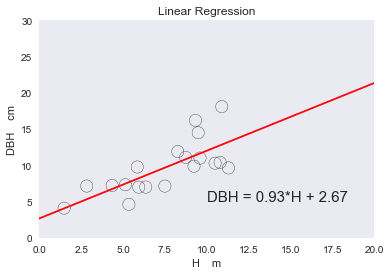

In [72]:
x = np.array(H)
y = np.array(DBH)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 20, 19)
yfit = model.predict(xfit[:, np.newaxis])

plt.xlabel('H    m')
plt.ylabel('DBH    cm')
plt.title('Linear Regression')
plt.text(10,5,'DBH = 0.93*H + 2.67',fontsize=15)
plt.scatter(x, y, s=150,facecolors='none', edgecolors='k')
plt.axis([0,20, 0, 30])
#plt.plot(x, y,'r')
plt.plot(xfit, yfit,'r')
plt.grid(False)


print("Model slope: %.2f " % model.coef_[0])
print("Model intercept:%.2f" % model.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y, yfit))
print('Variance score: %.2f' % r2_score(y, yfit))

In [77]:
HC = np.loadtxt(r'heigt_copared.txt',skiprows=1)

In [132]:
HC_re = []
HC_ca = []
for i in range(219):
    HC_re.append(HC[i][0])
    HC_ca.append(HC[i][1])
a = np.arange(0,32.85,0.15)
b = a
c1 = a + 1
c2 = a - 1
d1 = a + 5
d2 = a - 5
A = np.array(a)
B = np.array(b)
C1 = np.array(c1)
C2 = np.array(c2)
D1 = np.array(d1)
D2 = np.array(d2)

Model slope: 0.10 
Model intercept:10.76
Mean squared error: 14.87
Variance score: -0.53


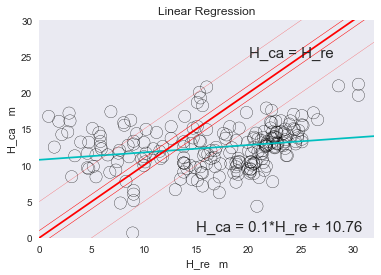

In [143]:
x = np.array(HC_re)
y = np.array(HC_ca)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 35, 219)
yfit = model.predict(xfit[:, np.newaxis])

plt.xlabel('H_re   m')
plt.ylabel('H_ca    m')
plt.title('Linear Regression')
plt.text(15,1,'H_ca = 0.1*H_re + 10.76',fontsize=15)
plt.text(20,25,'H_ca = H_re',fontsize=15)
plt.scatter(x, y, s=150,facecolors='none', edgecolors='k')
plt.axis([0,32, 0, 30])
#plt.plot(x, y,'r')
plt.plot(xfit, yfit,'c')
plt.plot(A,C1,'r-',linewidth=0.5)
plt.plot(A,C2,'r-',linewidth=0.5)
plt.plot(A,D1,'r-',linewidth=0.2)
plt.plot(A,D2,'r-',linewidth=0.2)
plt.plot(A,B,'r')
plt.grid(False)


print("Model slope: %.2f " % model.coef_[0])
print("Model intercept:%.2f" % model.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y, yfit))
print('Variance score: %.2f' % r2_score(y, yfit))

In [142]:
count = 0
for x in range(219):
    if abs(HC[x][0]-HC[x][1]) <= 1:
        count = count + 1
print count    
count_1 = 0
for x in range(219):
    if abs(HC[x][0]-HC[x][1]) <= 5:
        count_1 = count_1 + 1
print count_1 
count_1 = 0
for x in range(219):
    if -HC[x][0]+HC[x][1] > 1:
        count_1 = count_1 + 1
print count_1/219.
print count_1

11
69
0.24200913242
53
